In [1]:
import function.DataFunction
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import  GridSearchCV, cross_val_score
from sklearn.svm import SVC
import function.visualise
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization

In [2]:
path =  'C://python//train//'
fallPath = path + 'fall_csv//'
normalPath = path + 'normal_csv//'

In [3]:
dtf = function.DataFunction.DataFunction()
vi = function.visualise.Visualise()

# Origin dataset

In [4]:
label = dtf.labelSet("origin", fallPath, normalPath)

In [5]:
label, label.shape

(array([ 1,  1,  1, ..., -1, -1, -1]), (8853,))

In [6]:
rawFallData = pd.concat([pd.read_csv(fallPath + file) for file in os.listdir(fallPath)])
rawNormalData = pd.concat([pd.read_csv(normalPath + file) for file in os.listdir(normalPath)]) 

In [7]:
data = np.concatenate((rawFallData, rawNormalData), axis=0)

In [8]:
indices = np.arange(label.shape[0])

In [9]:
np.random.shuffle(indices)

In [10]:
data, label = data[indices], label[indices]

In [11]:
data.shape, label.shape

((8853, 132), (8853,))

## Split train test validation

In [12]:
x_train, x_test, x_val, y_train, y_test, y_val = dtf.splitData(data, label)

In [13]:
x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape

((5311, 132), (1771, 132), (1771, 132), (5311,), (1771,), (1771,))

In [14]:
y_train[y_train == 1].shape, y_train[y_train == -1].shape

((1566,), (3745,))

In [15]:
y_test[y_test == 1].shape, y_test[y_test == -1].shape

((503,), (1268,))

In [16]:
y_val[y_val == 1].shape, y_val[y_val == -1].shape

((490,), (1281,))

## Make model 

In [17]:
def model_grid():
    param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
    grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
    return grid

In [18]:
modelGrid = model_grid()

## Fit imbalanced data

### Grid search

In [19]:
modelGrid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [20]:
modelGrid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

### Validation

In [21]:
def validate(x_val, y_val, model):
    scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
    for score in scoring:
        scores = cross_val_score(model, x_val, y_val, cv=10, scoring=score)
        print(score, scores.mean())

In [22]:
validate(x_val, y_val, modelGrid.best_estimator_)

accuracy 0.9926680632260523
precision_macro 0.9937135068696531
recall_macro 0.9880003164056319
f1_macro 0.9907661498372194


### Visualise result

In [23]:
y_pred = modelGrid.predict(x_test)

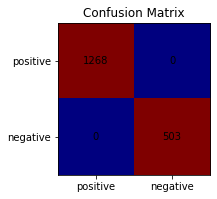

In [24]:
vi.conf_mat(y_test, y_pred)

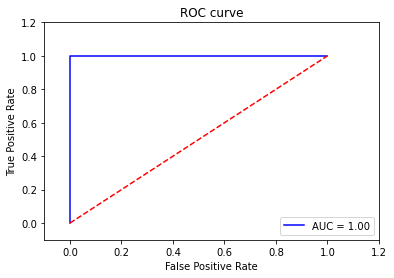

In [25]:
vi.show_roc(y_test, y_pred)

In [26]:
vi.report(y_test, y_pred)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00       503

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



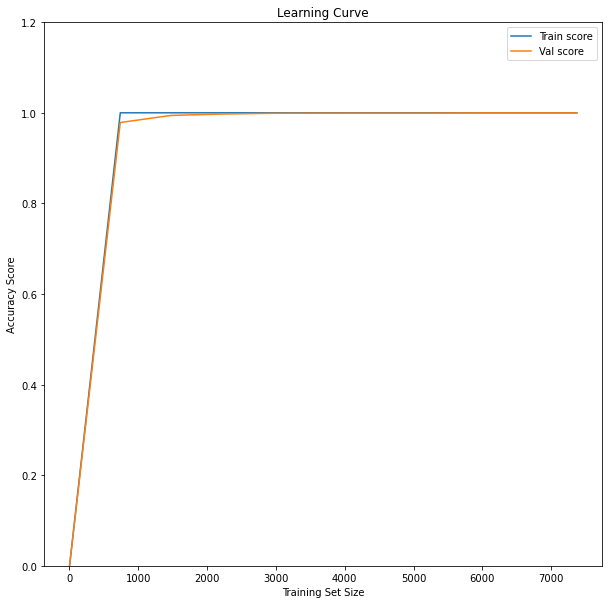

In [27]:
vi.learning_curve_plot(data, label, modelGrid.best_estimator_)

## Balance data

In [28]:
x_train, y_train = dtf.balanceTrainData(x_train, y_train)

In [29]:
x_val, y_val = dtf.balanceTrainData(x_val, y_val)

In [30]:
y_train[y_train == 1].shape, y_train[y_train == -1].shape

((3745,), (3745,))

In [31]:
y_val[y_val == 1].shape, y_val[y_val == -1].shape

((1281,), (1281,))

In [32]:
modelSmote = model_grid()
modelSmote.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [33]:
validate(x_val, y_val, modelSmote.best_estimator_)

accuracy 0.9976638497081712
precision_macro 0.9977210468030542
recall_macro 0.9976592781007753
f1_macro 0.997663254408802


In [34]:
y_pred = modelSmote.predict(x_test)

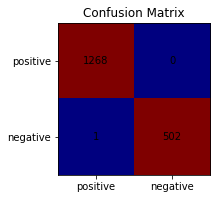

In [35]:
vi.conf_mat(y_test, y_pred)

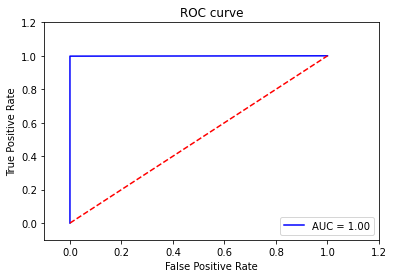

In [36]:
vi.show_roc(y_test, y_pred)

In [37]:
vi.report(y_test, y_pred)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00       503

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



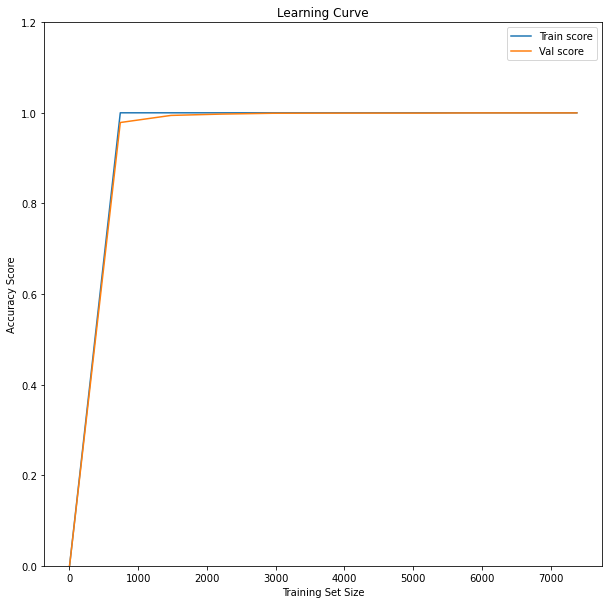

In [38]:
vi.learning_curve_plot(data, label, modelSmote.best_estimator_)

# Add fall frame

In [39]:
label = dtf.labelSet(choice = "addframe", fallPath = fallPath, normalPath= normalPath)

In [40]:
label[label == 1].shape, label[label == -1].shape

((2259,), (6594,))

In [41]:
data = np.concatenate((rawFallData, rawNormalData), axis=0)

In [42]:
data.shape, label.shape

((8853, 132), (8853,))

In [43]:
indices = np.arange(label.shape[0])

In [44]:
np.random.shuffle(indices)

In [45]:
data, label = data[indices], label[indices]

In [46]:
x_train, x_test, x_val, y_train, y_test, y_val = dtf.splitData(data, label)

In [47]:
y_train[y_train == 1].shape, y_train[y_train == -1].shape

((1347,), (3964,))

## Imbalanced fit

In [48]:
modelImbalanced = model_grid()
modelImbalanced.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [49]:
validate(x_val, y_val, modelImbalanced.best_estimator_)

accuracy 0.9830603694534374
precision_macro 0.980045665215151
recall_macro 0.9758604129579901
f1_macro 0.9778470617699927


In [50]:
y_pred = modelImbalanced.predict(x_test)

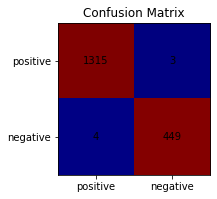

In [51]:
vi.conf_mat(y_test, y_pred)

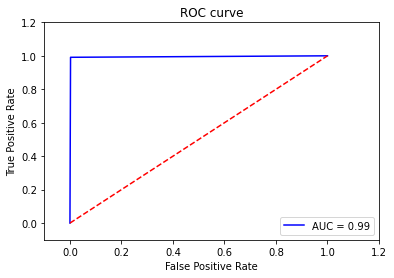

In [52]:
vi.show_roc(y_test, y_pred)

In [53]:
vi.report(y_test, y_pred)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1318
           1       0.99      0.99      0.99       453

    accuracy                           1.00      1771
   macro avg       1.00      0.99      0.99      1771
weighted avg       1.00      1.00      1.00      1771



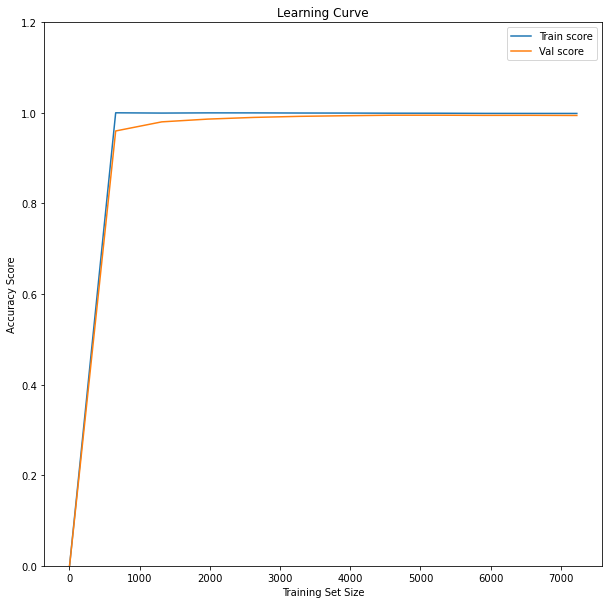

In [54]:
vi.learning_curve_plot(data, label, modelImbalanced.best_estimator_)

## Balanced fit

In [55]:
x_train, y_train = dtf.balanceTrainData(x_train, y_train)
x_val, y_val = dtf.balanceTrainData(x_val, y_val)

In [56]:
y_train[y_train == 1].shape, y_train[y_train == -1].shape

((3964,), (3964,))

In [57]:
y_val[y_val == 1].shape, y_val[y_val == -1].shape

((1312,), (1312,))

In [58]:
modelBalanced = model_grid()
modelBalanced.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [59]:
validate(x_val, y_val, modelBalanced.best_estimator_)

accuracy 0.9939003860331466
precision_macro 0.9939814331316944
recall_macro 0.9938989127920426
f1_macro 0.9938998474788663


In [60]:
y_pred = modelBalanced.predict(x_test)

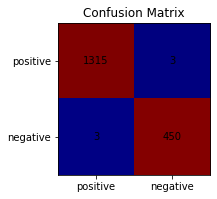

In [61]:
vi.conf_mat(y_test, y_pred)

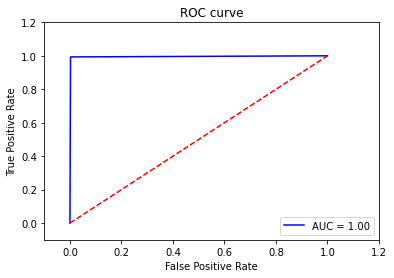

In [62]:
vi.show_roc(y_test, y_pred)

In [63]:
vi.report(y_test, y_pred)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1318
           1       0.99      0.99      0.99       453

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



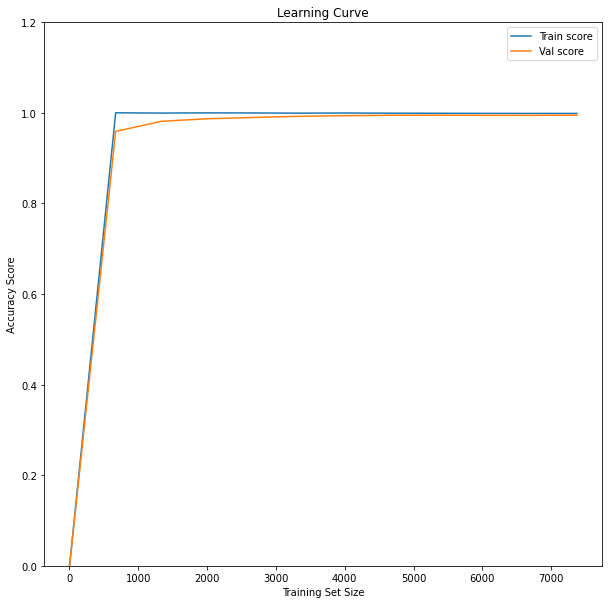

In [64]:
vi.learning_curve_plot(data, label, modelBalanced.best_estimator_)

## Using PSO

In [65]:
label[label == 1].shape, label[label == -1].shape

((2259,), (6594,))

In [66]:
data, label = dtf.balanceTrainData(data, label)

In [67]:
x_train, x_test, x_val, y_train, y_test, y_val = dtf.splitData(data, label)

In [68]:
class SVMFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [69]:
problem = SVMFeatureSelection(data, label)
task = Task(problem, max_iters=50)
algorithm = ParticleSwarmOptimization(population_size=40, group_size=20)
best_features, best_fitness = algorithm.run(task)

In [70]:
selected_features = best_features >= 0.5

In [71]:
selected_features

array([False, False,  True,  True,  True, False,  True, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,  True, False,  True, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
        True, False,  True,  True, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,

In [72]:
modelPSO = model_grid()
modelPSO.fit(x_train[:,selected_features], y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [73]:
validate(x_val[:,selected_features], y_val, modelPSO.best_estimator_)

accuracy 0.9901385528286669
precision_macro 0.9901840564081589
recall_macro 0.9902099824762823
f1_macro 0.990137326292504


In [74]:
y_pred = modelPSO.predict(x_test[:,selected_features])
vi.report(y_test, y_pred)

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      1293
           1       0.99      1.00      1.00      1345

    accuracy                           1.00      2638
   macro avg       1.00      1.00      1.00      2638
weighted avg       1.00      1.00      1.00      2638



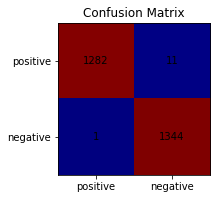

In [75]:
vi.conf_mat(y_test, y_pred)

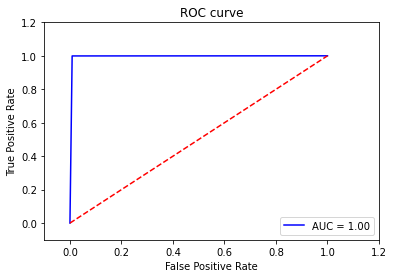

In [76]:
vi.show_roc(y_test, y_pred)

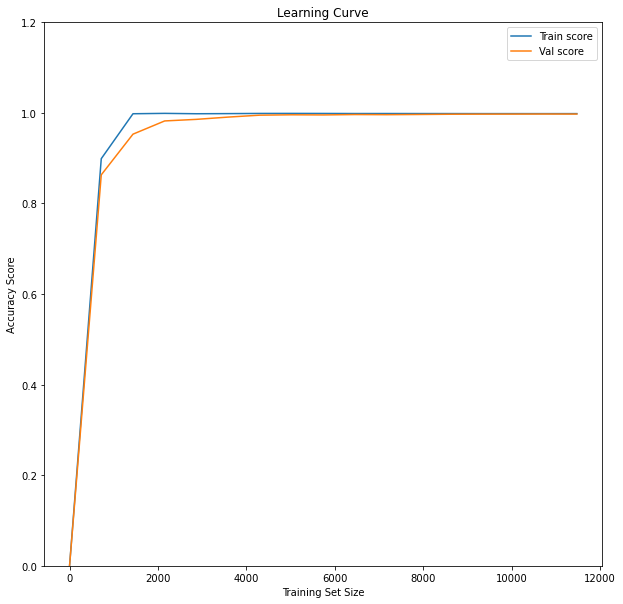

In [79]:
vi.learning_curve_plot(data[:,selected_features], label, modelPSO.best_estimator_)